In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(5)
W1 = np.random.randn(3,2)
b1 = np.random.randn(3,1)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
W3 = np.random.randn(2,1)
b3 = np.random.randn(2,1)

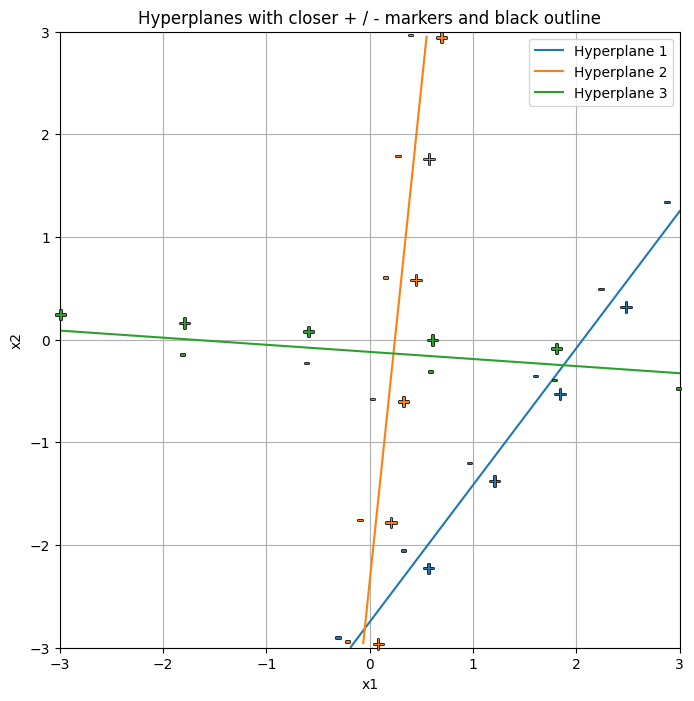

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe


# Plot range
x_min, x_max = -3, 3
y_min, y_max = -3, 3

plt.figure(figsize=(8, 8))
colors = plt.cm.tab10.colors  # distinct colors for each hyperplane

def clip_to_bounds(x, y, x_min, x_max, y_min, y_max):
    """Check if point lies inside plot boundaries."""
    return (x_min <= x <= x_max) and (y_min <= y <= y_max)

for i in range(W1.shape[0]):
    w = W1[i]
    b = b1[i].item()
    color = colors[i % len(colors)]
    offset = 0.15  # closer to the line than before

    if abs(w[1]) > 1e-6:
        # Line within bounds
        x_vals = np.linspace(x_min, x_max, 1000)
        y_vals = -(w[0]*x_vals + b)/w[1]

        mask = (y_vals >= y_min) & (y_vals <= y_max)
        x_line = x_vals[mask]
        y_line = y_vals[mask]

        plt.plot(x_line, y_line, color=color, label=f'Hyperplane {i+1}')

        # Normal vector
        n = w / np.linalg.norm(w)

        # Cumulative arc length
        ds = np.sqrt(np.diff(x_line)**2 + np.diff(y_line)**2)
        s = np.concatenate(([0], np.cumsum(ds)))

        # Evenly spaced markers
        num_marks = 6
        s_targets = np.linspace(0, s[-1], num_marks)
        x_marks = np.interp(s_targets, s, x_line)
        y_marks = np.interp(s_targets, s, y_line)

        # Place + and - signs with black outline
        for xm, ym in zip(x_marks, y_marks):
            xp, yp = xm + offset*n[0], ym + offset*n[1]
            xm_, ym_ = xm - offset*n[0], ym - offset*n[1]
            if clip_to_bounds(xp, yp, x_min, x_max, y_min, y_max):
                plt.text(xp, yp, '+', color=color, ha='center', va='center', fontsize=12,
                         path_effects=[pe.withStroke(linewidth=1.2, foreground="black")])
            if clip_to_bounds(xm_, ym_, x_min, x_max, y_min, y_max):
                plt.text(xm_, ym_, '-', color=color, ha='center', va='center', fontsize=12,
                         path_effects=[pe.withStroke(linewidth=1.2, foreground="black")])

    else:
        # Vertical line: x = -b/w[0]
        x_line = -b/w[0]
        if x_min <= x_line <= x_max:
            plt.axvline(x_line, color=color, label=f'Hyperplane {i+1}')

        n = w / np.linalg.norm(w)
        y_marks = np.linspace(y_min, y_max, 6)

        for ym in y_marks:
            xp, yp = x_line + offset*n[0], ym
            xm_, ym_ = x_line - offset*n[0], ym
            if clip_to_bounds(xp, yp, x_min, x_max, y_min, y_max):
                plt.text(xp, yp, '+', color=color, ha='center', va='center', fontsize=12,
                         path_effects=[pe.withStroke(linewidth=1.2, foreground="black")])
            if clip_to_bounds(xm_, ym_, x_min, x_max, y_min, y_max):
                plt.text(xm_, ym_, '-', color=color, ha='center', va='center', fontsize=12,
                         path_effects=[pe.withStroke(linewidth=1.2, foreground="black")])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Hyperplanes with closer + / - markers and black outline")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# # Project the hyperplane induced by the second layer through all the regions of the first layer:

# prjections = []

# for q in [(1,1,1), (1,1,0), (1,0,1), (0,1,1), (1,0,0), (0,1,0), (0,0,1), (0,0,0)]:
#     projected_slopes = W2 @ np.diag(q) @ W1
#     projected_offsets = W2 @ np.diag(q) @ b1 + b2

    

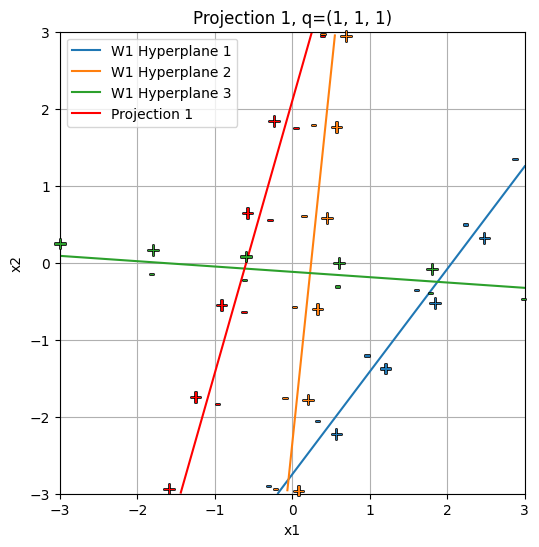

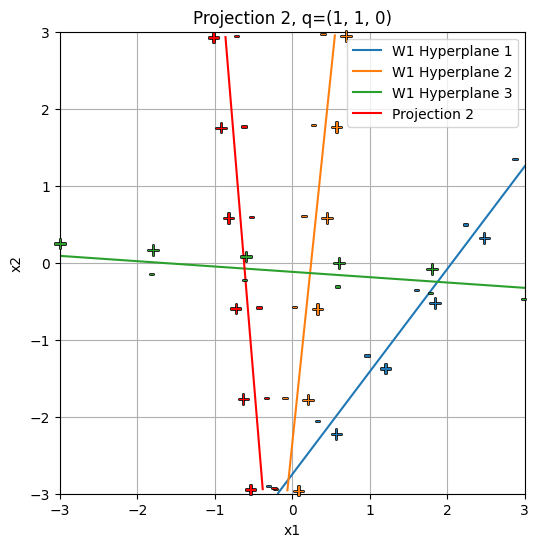

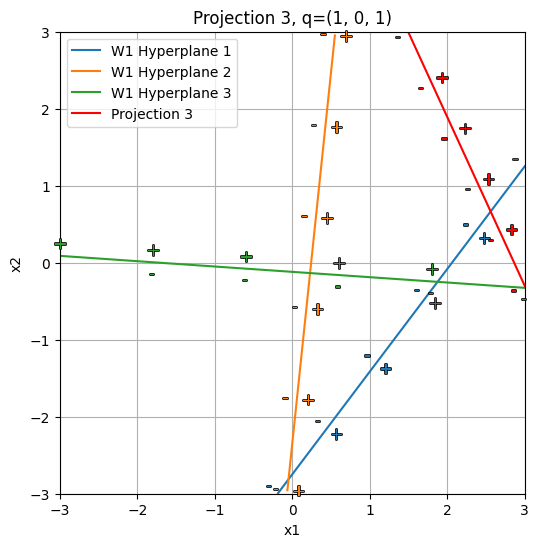

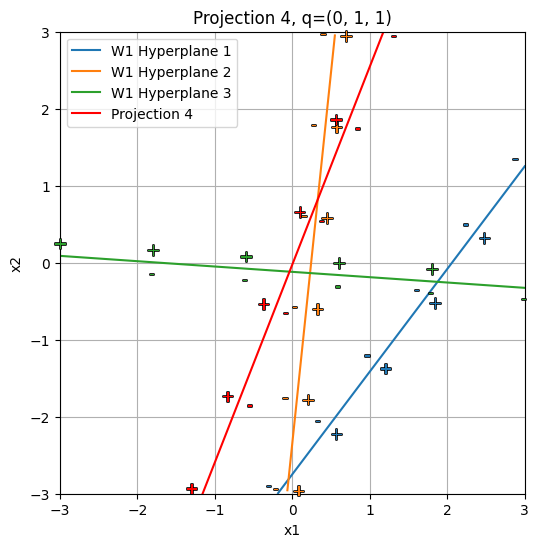

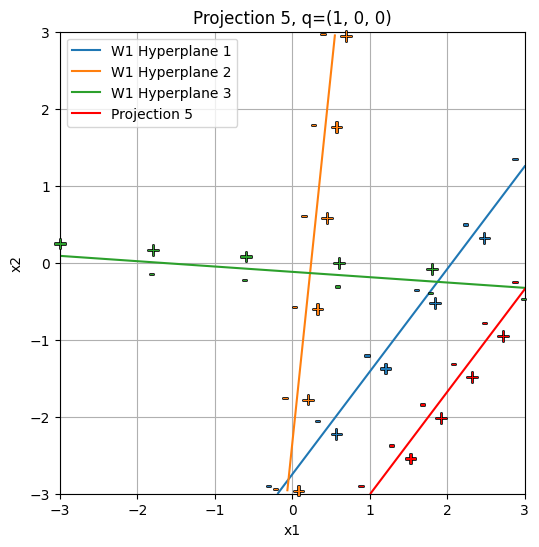

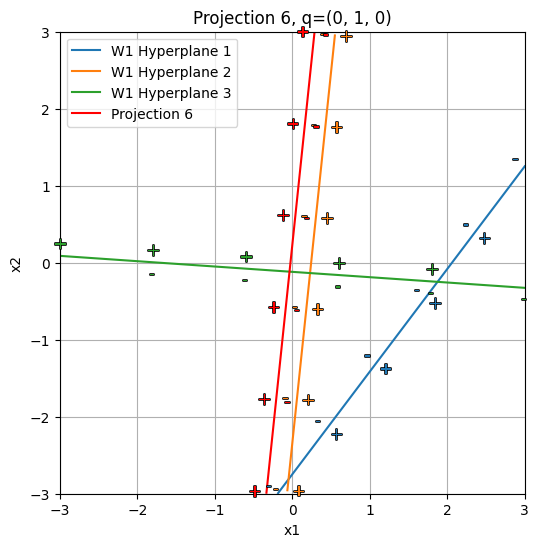

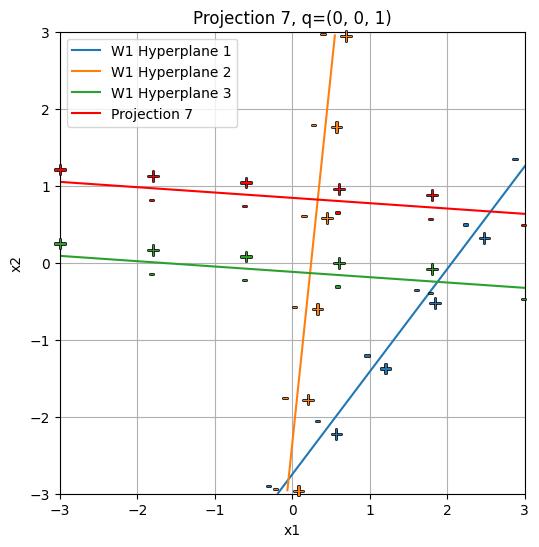

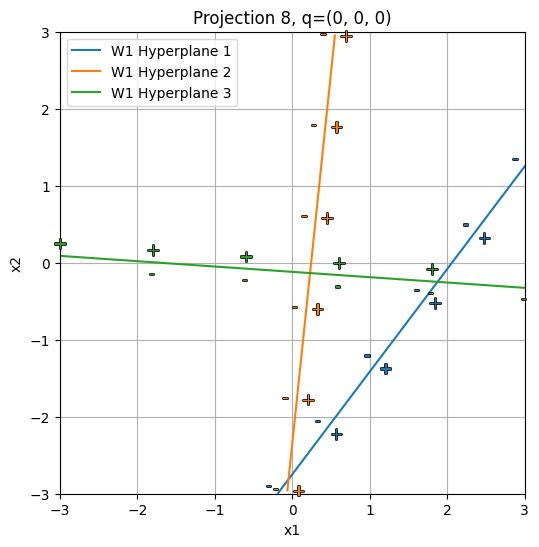

In [5]:

W2 = np.random.randn(1, 3)
b2 = np.random.randn(1, 1)

# Generate projections
projections = []
for q in [(1,1,1), (1,1,0), (1,0,1), (0,1,1), 
          (1,0,0), (0,1,0), (0,0,1), (0,0,0)]:
    q = np.array(q, dtype=int)  # ensure ints
    projected_slope = W2 @ np.diag(q) @ W1  # shape (1,2)
    projected_offset = (W2 @ np.diag(q) @ b1 + b2).item()
    projections.append((projected_slope.flatten(), projected_offset, tuple(int(x) for x in q)))

# Plot range
x_min, x_max = -3, 3
y_min, y_max = -3, 3
colors = plt.cm.tab10.colors

def clip_to_bounds(x, y, x_min, x_max, y_min, y_max):
    return (x_min <= x <= x_max) and (y_min <= y <= y_max)

def plot_hyperplane(ax, w, b, color, label, offset=0.15, num_marks=6):
    """Plot a hyperplane with +/- markers."""
    if abs(w[1]) > 1e-6:
        x_vals = np.linspace(x_min, x_max, 1000)
        y_vals = -(w[0]*x_vals + b)/w[1]
        mask = (y_vals >= y_min) & (y_vals <= y_max)
        if np.any(mask):
            x_line, y_line = x_vals[mask], y_vals[mask]
            ax.plot(x_line, y_line, color=color, label=label)

            n = w / np.linalg.norm(w)
            ds = np.sqrt(np.diff(x_line)**2 + np.diff(y_line)**2)
            s = np.concatenate(([0], np.cumsum(ds)))
            s_targets = np.linspace(0, s[-1], num_marks)
            x_marks = np.interp(s_targets, s, x_line)
            y_marks = np.interp(s_targets, s, y_line)

            for xm, ym in zip(x_marks, y_marks):
                xp, yp = xm + offset*n[0], ym + offset*n[1]
                xm_, ym_ = xm - offset*n[0], ym - offset*n[1]
                if clip_to_bounds(xp, yp, x_min, x_max, y_min, y_max):
                    ax.text(xp, yp, '+', color=color, ha='center', va='center', fontsize=12,
                            path_effects=[pe.withStroke(linewidth=1.2, foreground="black")])
                if clip_to_bounds(xm_, ym_, x_min, x_max, y_min, y_max):
                    ax.text(xm_, ym_, '-', color=color, ha='center', va='center', fontsize=12,
                            path_effects=[pe.withStroke(linewidth=1.2, foreground="black")])
    else:
        x_line = -b/w[0]
        if x_min <= x_line <= x_max:
            ax.axvline(x_line, color=color, label=label)
            n = w / np.linalg.norm(w)
            y_marks = np.linspace(y_min, y_max, num_marks)
            for ym in y_marks:
                xp, yp = x_line + offset*n[0], ym
                xm_, ym_ = x_line - offset*n[0], ym
                if clip_to_bounds(xp, yp, x_min, x_max, y_min, y_max):
                    ax.text(xp, yp, '+', color=color, ha='center', va='center', fontsize=12,
                            path_effects=[pe.withStroke(linewidth=1.2, foreground="black")])
                if clip_to_bounds(xm_, ym_, x_min, x_max, y_min, y_max):
                    ax.text(xm_, ym_, '-', color=color, ha='center', va='center', fontsize=12,
                            path_effects=[pe.withStroke(linewidth=1.2, foreground="black")])

# --- One plot per projection
for j, (w, b, q) in enumerate(projections):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(f"Projection {j+1}, q={q}")

    # Plot the original hyperplanes
    for i in range(W1.shape[0]):
        plot_hyperplane(ax, W1[i], b1[i].item(), colors[i % len(colors)], f"W1 Hyperplane {i+1}")

    # Plot this projection hyperplane
    if np.linalg.norm(w) > 1e-6:
        plot_hyperplane(ax, w, b, "r", f"Projection {j+1}")

    ax.legend()
    ax.grid(True)
    plt.show()


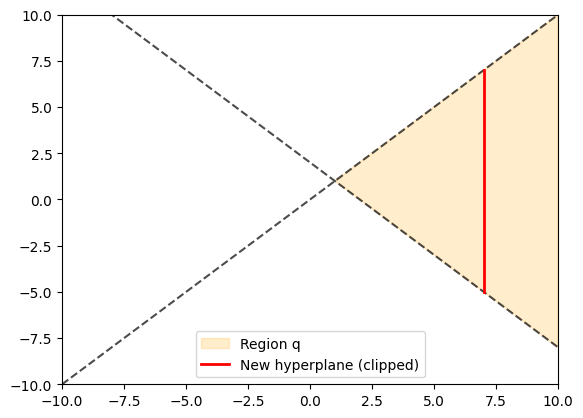

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon
from shapely.ops import split

# ------------------------------------------------------------
# Helper: line equation -> long coordinate array
def line_from_abc(a, b, c, xlim=(-10, 10)):
    xs = np.linspace(xlim[0], xlim[1], 400)
    if abs(b) > 1e-9:  # normal case
        ys = (-a*xs - c)/b
    else:  # vertical line
        xs = np.full_like(xs, -c/a)
        ys = np.linspace(xlim[0], xlim[1], 400)
    return np.column_stack([xs, ys])  # Nx2 array

# ------------------------------------------------------------
# Build feasible region from hyperplanes + sign vector q
def region_from_q(hyperplanes, q, bounding_box=10):
    bounding_poly = Polygon([
        (-bounding_box, -bounding_box),
        (-bounding_box,  bounding_box),
        ( bounding_box,  bounding_box),
        ( bounding_box, -bounding_box)
    ])
    region_poly = bounding_poly

    for (a, b, c), sign in zip(hyperplanes, q):
        # create dividing line
        big = 1e4
        if abs(b) > 1e-9:
            y1 = (-a*(-big) - c)/b
            y2 = (-a*( big) - c)/b
            line_coords = [(-big, y1), (big, y2)]
        else:
            x = -c/a
            line_coords = [(x, -big), (x, big)]
        dividing_line = LineString(line_coords)

        # split bounding box into two polygons
        split_result = split(region_poly.envelope, dividing_line)

        # pick half-plane consistent with sign
        chosen = None
        for poly in split_result.geoms:
            if poly.is_empty:
                continue
            cx, cy = poly.centroid.coords[0]
            if sign * (a*cx + b*cy + c) >= 0:
                chosen = poly
                break

        if chosen is None:
            return Polygon()  # empty region
        region_poly = region_poly.intersection(chosen)

    return region_poly

# ------------------------------------------------------------
# Example usage
if __name__ == "__main__":
    # Define global hyperplanes ax + by + c = 0
    hyperplanes = [
        (1, 1, -2),   # line 1
        (-1, 1, 0),   # line 2
    ]

    # Region specification by q = [+1, -1] (signs)
    q = [1, -1]
    region_poly = region_from_q(hyperplanes, q, bounding_box=10)

    # New hyperplane: force through region centroid for demo
    if not region_poly.is_empty:
        cx, cy = region_poly.centroid.coords[0]
        new_h = (1, 0, -cx)  # vertical line: x = cx
    else:
        raise RuntimeError("Region polygon is empty")

    # --------------------------------------------------------
    # Plot
    fig, ax = plt.subplots()

    # Plot global hyperplanes
    for (a, b, c) in hyperplanes:
        coords = line_from_abc(a, b, c)
        ax.plot(coords[:, 0], coords[:, 1], 'k--', alpha=0.7)

    # Fill feasible region
    if not region_poly.is_empty:
        x, y = region_poly.exterior.xy
        ax.fill(x, y, alpha=0.2, color='orange', label="Region q")

    # Clip and plot new hyperplane
    coords = line_from_abc(*new_h)
    new_line = LineString(coords)
    clipped_line = new_line.intersection(region_poly)

    if not clipped_line.is_empty:
        if clipped_line.geom_type == 'LineString':
            x, y = clipped_line.xy
            ax.plot(x, y, 'r-', lw=2, label="New hyperplane (clipped)")
        elif clipped_line.geom_type == 'MultiLineString':
            for part in clipped_line.geoms:
                x, y = part.xy
                ax.plot(x, y, 'r-', lw=2)

    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.legend()
    plt.show()

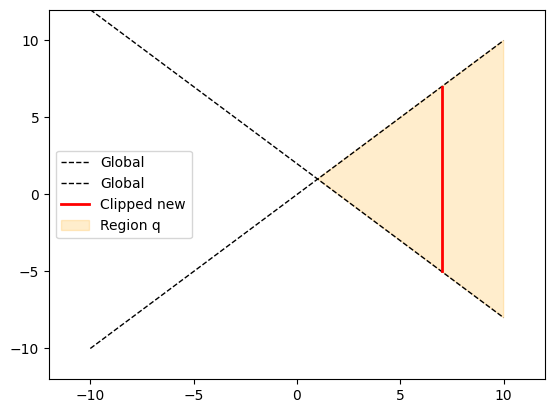

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon
from shapely.ops import split

# ------------------------------------------------------------
# Convert (a,b,c) to long line segment (for plotting/clipping)
def line_from_abc(a, b, c, xlim=(-10, 10)):
    xs = np.linspace(xlim[0], xlim[1], 400)
    if abs(b) > 1e-9:  # normal case
        ys = (-a*xs - c) / b
    else:  # vertical line
        xs = np.full_like(xs, -c/a)
        ys = np.linspace(xlim[0], xlim[1], 400)
    return np.column_stack([xs, ys])  # Nx2 array

# ------------------------------------------------------------
# Build feasible region from hyperplanes + sign vector q
def region_from_q(hyperplanes, q, bounding_box=10):
    bounding_poly = Polygon([
        (-bounding_box, -bounding_box),
        (-bounding_box,  bounding_box),
        ( bounding_box,  bounding_box),
        ( bounding_box, -bounding_box)
    ])
    region_poly = bounding_poly

    for (a, b, c), sign in zip(hyperplanes, q):
        big = 1e4
        if abs(b) > 1e-9:
            y1 = (-a*(-big) - c)/b
            y2 = (-a*( big) - c)/b
            line_coords = [(-big, y1), (big, y2)]
        else:
            x = -c/a
            line_coords = [(x, -big), (x, big)]
        dividing_line = LineString(line_coords)

        split_result = split(region_poly.envelope, dividing_line)

        chosen = None
        for poly in split_result.geoms:
            if poly.is_empty:
                continue
            cx, cy = poly.centroid.coords[0]
            if sign * (a*cx + b*cy + c) >= 0:
                chosen = poly
                break

        if chosen is None:
            return Polygon()
        region_poly = region_poly.intersection(chosen)

    return region_poly

# ------------------------------------------------------------
# Plot hyperplane with optional clipping
def plot_hyperplane(ax, hyperplane, bounding_hyperplanes=None, q=None,
                    bounding_box=10, style="r-", linewidth=2, label=None):
    a, b, c = hyperplane
    coords = line_from_abc(a, b, c, xlim=(-bounding_box, bounding_box))
    new_line = LineString(coords)

    # If bounding_hyperplanes + q provided, clip to region
    if bounding_hyperplanes is not None and q is not None:
        region_poly = region_from_q(bounding_hyperplanes, q, bounding_box=bounding_box)
        clipped = new_line.intersection(region_poly)
    else:
        clipped = new_line

    # Plot results
    if clipped.is_empty:
        return

    if clipped.geom_type == "LineString":
        x, y = clipped.xy
        ax.plot(x, y, style, lw=linewidth, label=label)
    elif clipped.geom_type == "MultiLineString":
        for part in clipped.geoms:
            x, y = part.xy
            ax.plot(x, y, style, lw=linewidth, label=label)

# ------------------------------------------------------------
# Example usage
if __name__ == "__main__":
    fig, ax = plt.subplots()

    # Global hyperplanes
    hyperplanes = [
        (1, 1, -2),
        (-1, 1, 0),
    ]
    q = [1, -1]  # region specification

    # Plot global hyperplanes (always across full domain)
    for (a, b, c) in hyperplanes:
        plot_hyperplane(ax, (a, b, c), style="k--", linewidth=1, label="Global")

    # New hyperplane: vertical through centroid of region
    region_poly = region_from_q(hyperplanes, q, bounding_box=10)
    cx, cy = region_poly.centroid.coords[0]
    new_h = (1, 0, -cx)  # vertical line

    # Plot clipped hyperplane
    plot_hyperplane(ax, new_h, bounding_hyperplanes=hyperplanes, q=q,
                    style="r-", linewidth=2, label="Clipped new")

    # Fill region polygon
    if not region_poly.is_empty:
        x, y = region_poly.exterior.xy
        ax.fill(x, y, alpha=0.2, color="orange", label="Region q")

    ax.set_xlim(-12, 12)
    ax.set_ylim(-12, 12)
    ax.legend()
    plt.show()
